In [1]:
from bs4 import BeautifulSoup

In [2]:
import requests

### Request Information
Doing that with a URL

In [6]:
html_text = requests.get('https://gr.jooble.org/SearchResult?p=2&ukw=python').text # We need to get the text only

 W Piwik PRO wspólnymi siłami rozwijamy produkt badający zachowanie</span>...&nbsp;</div><div class="_2ySRhD"></div></div><div class="_15xYk4"><img align="right" src="/css/images/plogo/16674.gif" class="_3a5g1i" aria-hidden="true"/><div><div class="_1JrOtp _30OfJk"><div class="_3lDiEO"><p class="Ya0gV9">Piwik PRO</p></div></div><div class="fAH3JV _2fd0Bh _1HYDQk _1BK4fr"><svg class="_3QFOlZ _2qDARf _2XmdYx _1_rr6J _2j1Fch _1B9CAN _1s5e2F"><use xlink:href="#icon-map_marker-usage"></use></svg><div class="caption _2_Ab4T">Πολωνία</div></div><div class="fAH3JV _2fd0Bh _1HYDQk _1d4f0L"><svg class="_3QFOlZ _2qDARf _2XmdYx _1_rr6J _2j1Fch _1B9CAN Ms0fPl"><use xlink:href="#icon-clock_outline-usage"></use></svg><div class="caption e0VAhp">12 ημέρες πριν</div></div></div></div></section></article></div></div></div></div><div class="_1rKwPe"><ul class="_3MK1YV"><li class="_1R1_fv"><a href="https://gr.jooble.org" class="v2cIE0 button_simple button_size_M button_size_M_simple _1iPcaA _3_mXlE "><svg
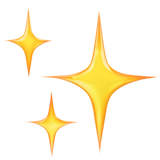
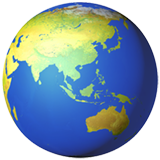

In [7]:
print(html_text)

### Using Beautiful Soup

In [70]:
soup = BeautifulSoup(html_text, 'lxml')

We will only use one Job post, se we use the method *.find* instead of *.find_all*

### Creating Automation on finding jobs

In [72]:
def find_jobs():
    
    # Initial
    html_text = requests.get('https://gr.jooble.org/SearchResult?p=2&ukw=python').text # We need to get the text only
    soup = BeautifulSoup(html_text, 'lxml')
    jobs = soup.find_all('article', class_ = 'FxQpvm yKsady')
    
    # Filters
#     print('Put some skill that you are not familiar with')
#     unfamiliar_skill = input('>')
#     print(f'Filtering out {unfamiliar_skill}\n')

    
    # Delete posts.txt file with previous results
    with open('posts.txt', 'w') as f:
        f.write('')
    
    # Itterate in each different job
    for index, job in enumerate(jobs):
        
        # Taking the Company's Names
        # If Error None Type raises, make the company_name = None
        try : company_name = job.find('p', class_ = 'Ya0gV9').text 
        except :company_name = 'None' 
        
        # Taking the job's Title
        job_title = job.find('h2', class_ = '_15V35X').text
        
        # Taking the job posted time
        time_posted = job.find('div', class_ = 'caption e0VAhp').text
        
        # Taking the link of job
        more_info = job.header.h2.a['data-href']

        # If there is more than a month for a job post, dont show the job post
        if 'ημέρες πριν' not in time_posted:
            continue 
        else:
            # if unfamiliar_skill not in skills:
            
            # Write results in a text
            with open(f'posts.txt', 'a+') as f:
                f.write(f'Job Title: {job_title}\n')
                f.write(f'Company Name: {company_name}\n')
                f.write(f'Time Posted: {time_posted}\n')
                f.write(f'More Info: {more_info}\n\n\n')

In [73]:
find_jobs()